# 2.1 PostgreSQL

Connecting to PostgreSQL from Python

In [1]:
import psycopg2

In [2]:
try:
     dbConnection = psycopg2.connect(user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "postgres")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     dbCursor.execute('CREATE DATABASE state_percentage2;')
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

Error while connecting to PostgreSQL database "state_percentage2" already exists



Creating a table in the new database

In [3]:
createString = """
CREATE TABLE state_percentage2(
state VARCHAR(255),
internet FLOAT,
education FLOAT);
"""

In [4]:
try:
    dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "state_percentage2")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

Error while connecting to PostgreSQL relation "state_percentage2" already exists



Populating the table on PostgreSQL

In [5]:
import csv
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "state_percentage2")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     insertString = "INSERT INTO state_percentage2 VALUES ('{}',"+"{},"+"{})"
     with open('C:\\Users\conno\\OneDrive\\Archive\\Studies\\PGDip in Data Analytics\\Database And Analytics Programming\\Project\\state_percentage2.csv', 'r') as f:
         reader = csv.reader(f)
         next(reader) # skip the header
         for row in reader:
             dbCursor.execute(insertString.format(*row))
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error:", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

Querying the table

In [6]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
sql = """
     SELECT * FROM state_percentage2;"""
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "state_percentage2")
     state_percentage2_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
     print ("Error:", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
print(state_percentage2_dataframe)

             state   internet  education
0          Alabama  21.253731  84.265672
1           Alaska  18.763333  91.203571
2          Arizona  17.600000  85.720000
3         Arkansas  21.706667  85.550667
4       California   9.725862  85.505172
..             ...        ...        ...
607       Virginia  16.005263  87.990977
608     Washington  10.053846  89.794872
609  West Virginia  18.543636  86.210909
610      Wisconsin  12.950000  92.633333
611        Wyoming  11.130435  93.517391

[612 rows x 3 columns]


Querying and visualising the data

        state  No Internet Access (%)  Education Attainment (%)
0     Alabama               21.253731                 84.265672
1      Alaska               18.763333                 91.203571
2     Arizona               17.600000                 85.720000
3    Arkansas               21.706667                 85.550667
4  California                9.725862                 85.505172



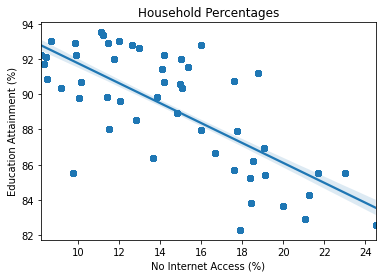

In [7]:
# Seaborn visualization library
import seaborn as sns

state_percentage2_dataframe.rename(columns = {'internet':'No Internet Access (%)', 'education':'Education Attainment (%)'}, inplace = True)
print(state_percentage2_dataframe.head())
print()

sns.regplot(x="No Internet Access (%)",
            y="Education Attainment (%)", 
            data=state_percentage2_dataframe).set(title='Household Percentages');



# 2.2 PostgreSQL

Connecting to PostgreSQL from Python

In [8]:
try:
     dbConnection = psycopg2.connect(user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "postgres")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     dbCursor.execute('CREATE DATABASE household_income;')
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

Error while connecting to PostgreSQL database "household_income" already exists



Creating a table in the database

In [9]:
createString = """
CREATE TABLE household_income(
income FLOAT,
value FLOAT);
"""

In [10]:
try:
    dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "household_income")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

Error while connecting to PostgreSQL relation "household_income" already exists



Populating the table on PostgreSQL

In [11]:
import csv
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "household_income")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     insertString = "INSERT INTO household_income VALUES ({},"+"{})"
     with open('C:\\Users\conno\\OneDrive\\Archive\\Studies\\PGDip in Data Analytics\\Database And Analytics Programming\\Project\\State5.csv', 'r') as f:
         reader = csv.reader(f)
         next(reader) # skip the header
         for row in reader:
             dbCursor.execute(insertString.format(*row))
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error:", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

Querying the table

In [12]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
sql = """
     SELECT * FROM household_income;"""
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "household_income")
     household_income_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
     print ("Error:", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
print(household_income_dataframe)

     income      value
0      54.0  21.253731
1      80.0  18.763333
2      65.0  17.600000
3      51.0  21.706667
4      83.0   9.725862
..      ...        ...
454    79.0  16.005263
455    80.0  10.053846
456    49.0  18.543636
457    65.0  12.950000
458    67.0  11.130435

[459 rows x 2 columns]


Querying and visualising the data

   Median of the Annual Household Income x1000  No Internet Access (%)
0                                         54.0               21.253731
1                                         80.0               18.763333
2                                         65.0               17.600000
3                                         51.0               21.706667
4                                         83.0                9.725862



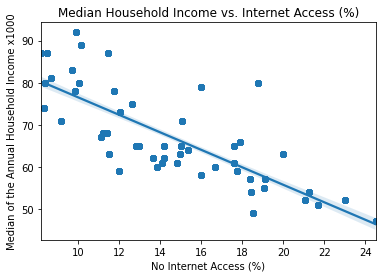

In [13]:
# Seaborn visualization library
import seaborn as sns

household_income_dataframe.rename(columns = {'value':'No Internet Access (%)', 'income':'Median of the Annual Household Income x1000'}, inplace = True)
print(household_income_dataframe.head())
print()

sns.regplot(x="No Internet Access (%)",
            y="Median of the Annual Household Income x1000", 
            data=household_income_dataframe).set(title='Median Household Income vs. Internet Access (%)');
